total_primary_signal_missing_count 2597196 20 % of things make up 72 %
total_cycle_second_missing_count 2233472 20 % of things make up 76 %
total_skipped_cycles_count 0
total_cycles_count 423588050
total_removed_cycles_count 20701106 20 % of things make up 79 %
total_invalid_cycle_length_count 8616327 20 % of things make up 87 %
total_invalid_transition_in_cycle_count 5731347 20 % of things make up 98 %
total_missing_observation_in_cycle_count 13901465 20 % of things make up 84 %
total_median_metric_of_all_things 1.0


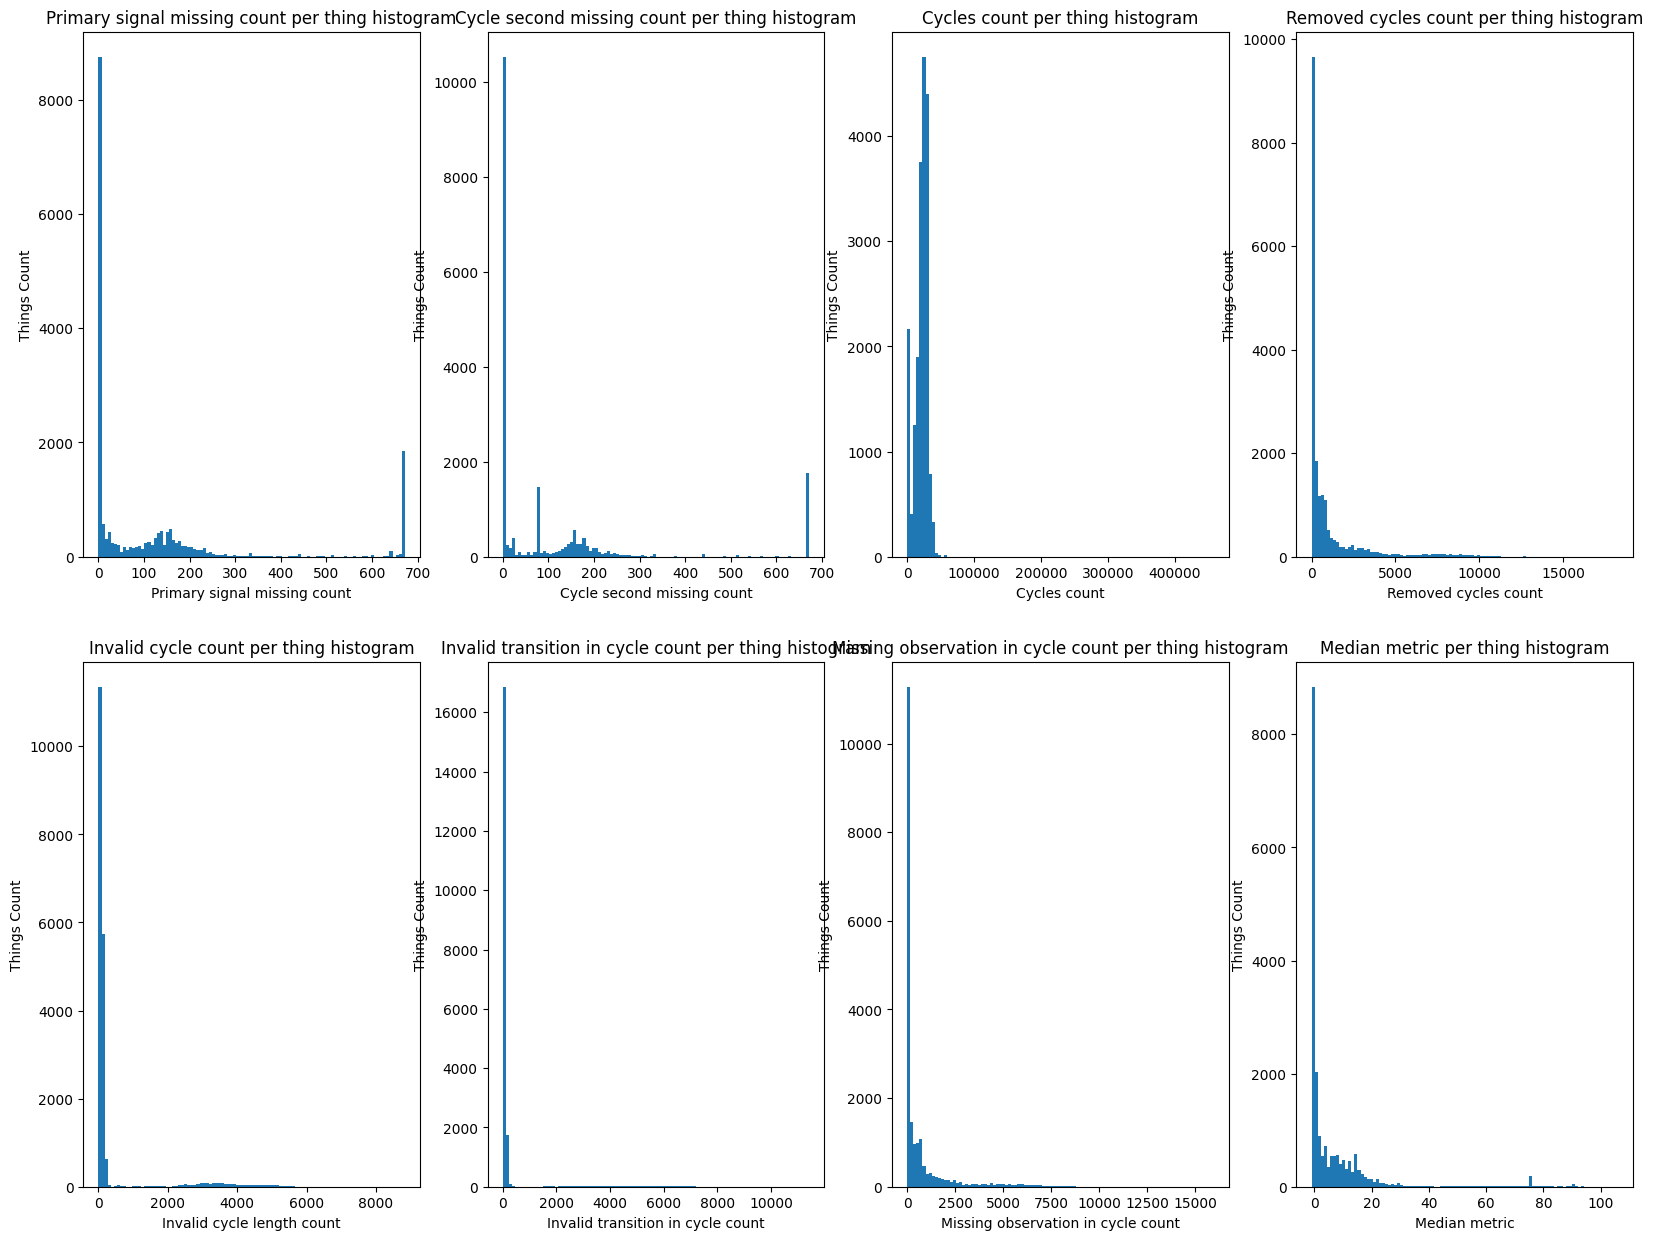

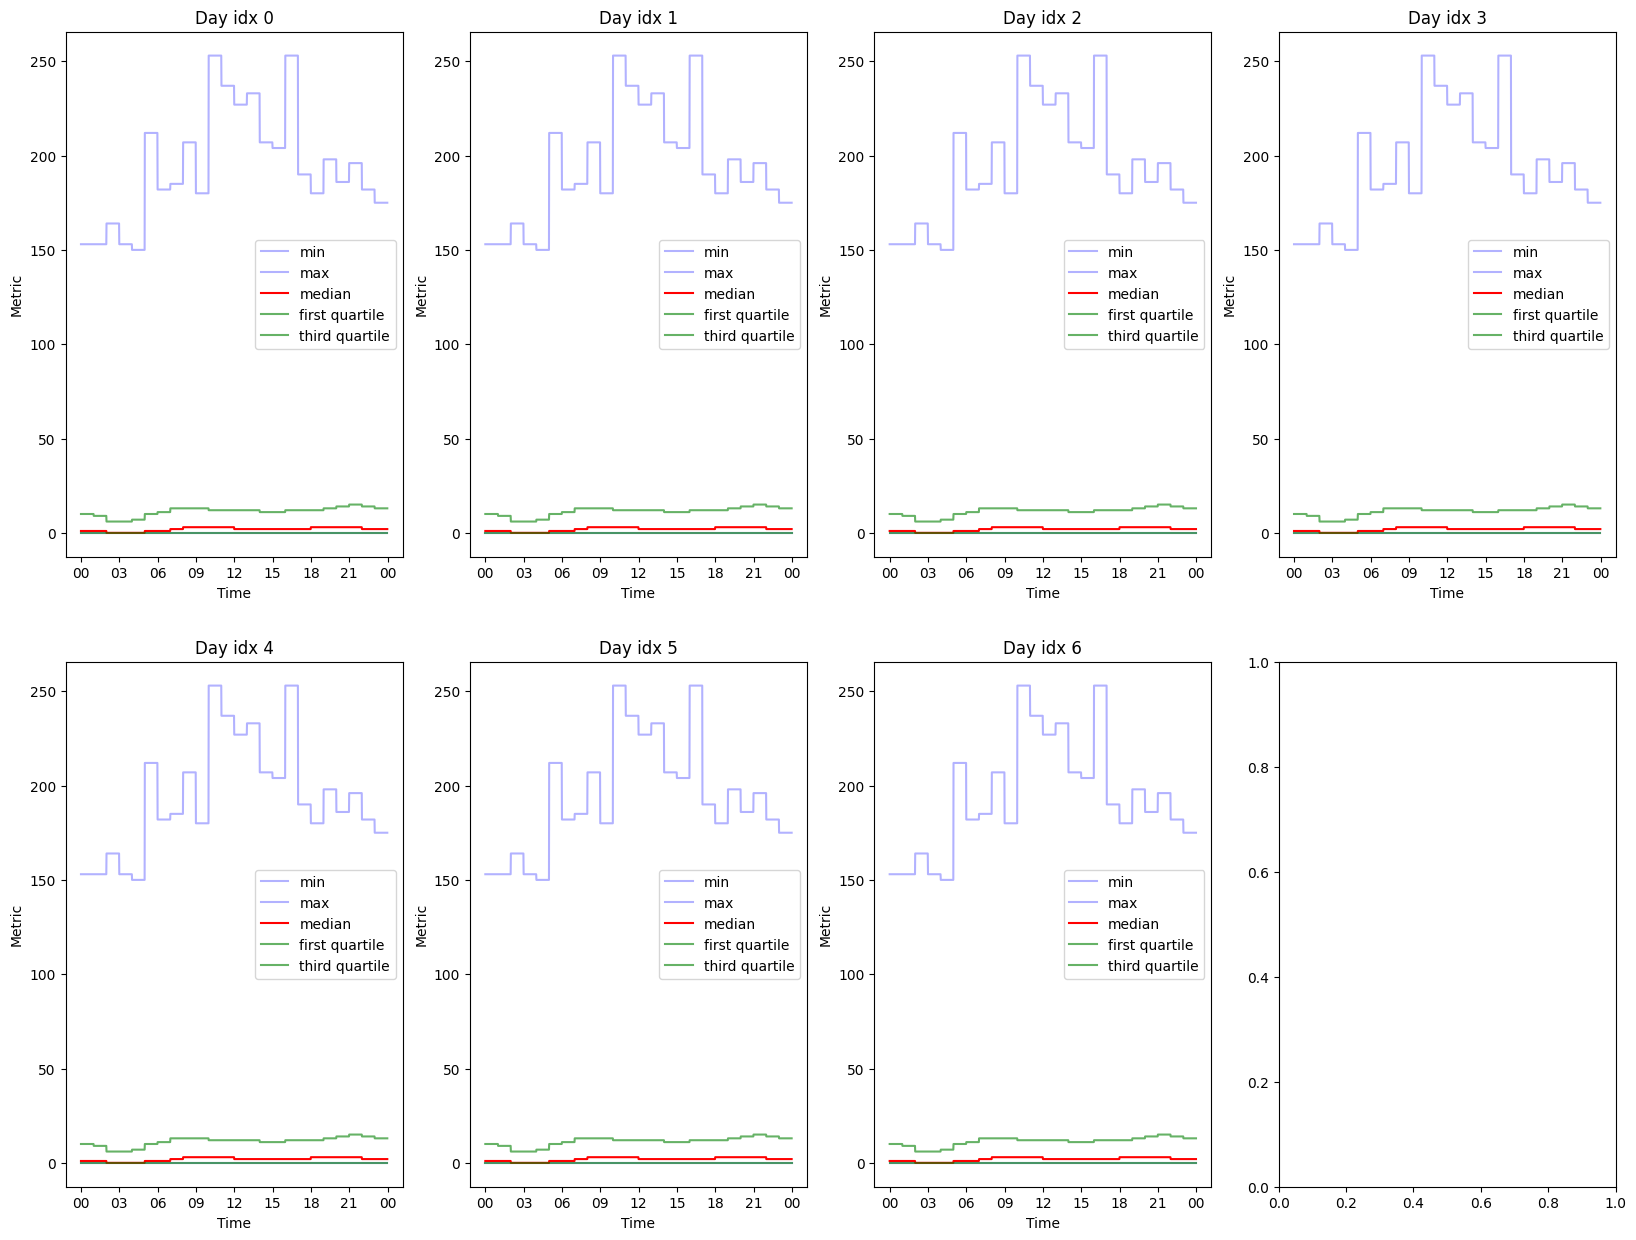

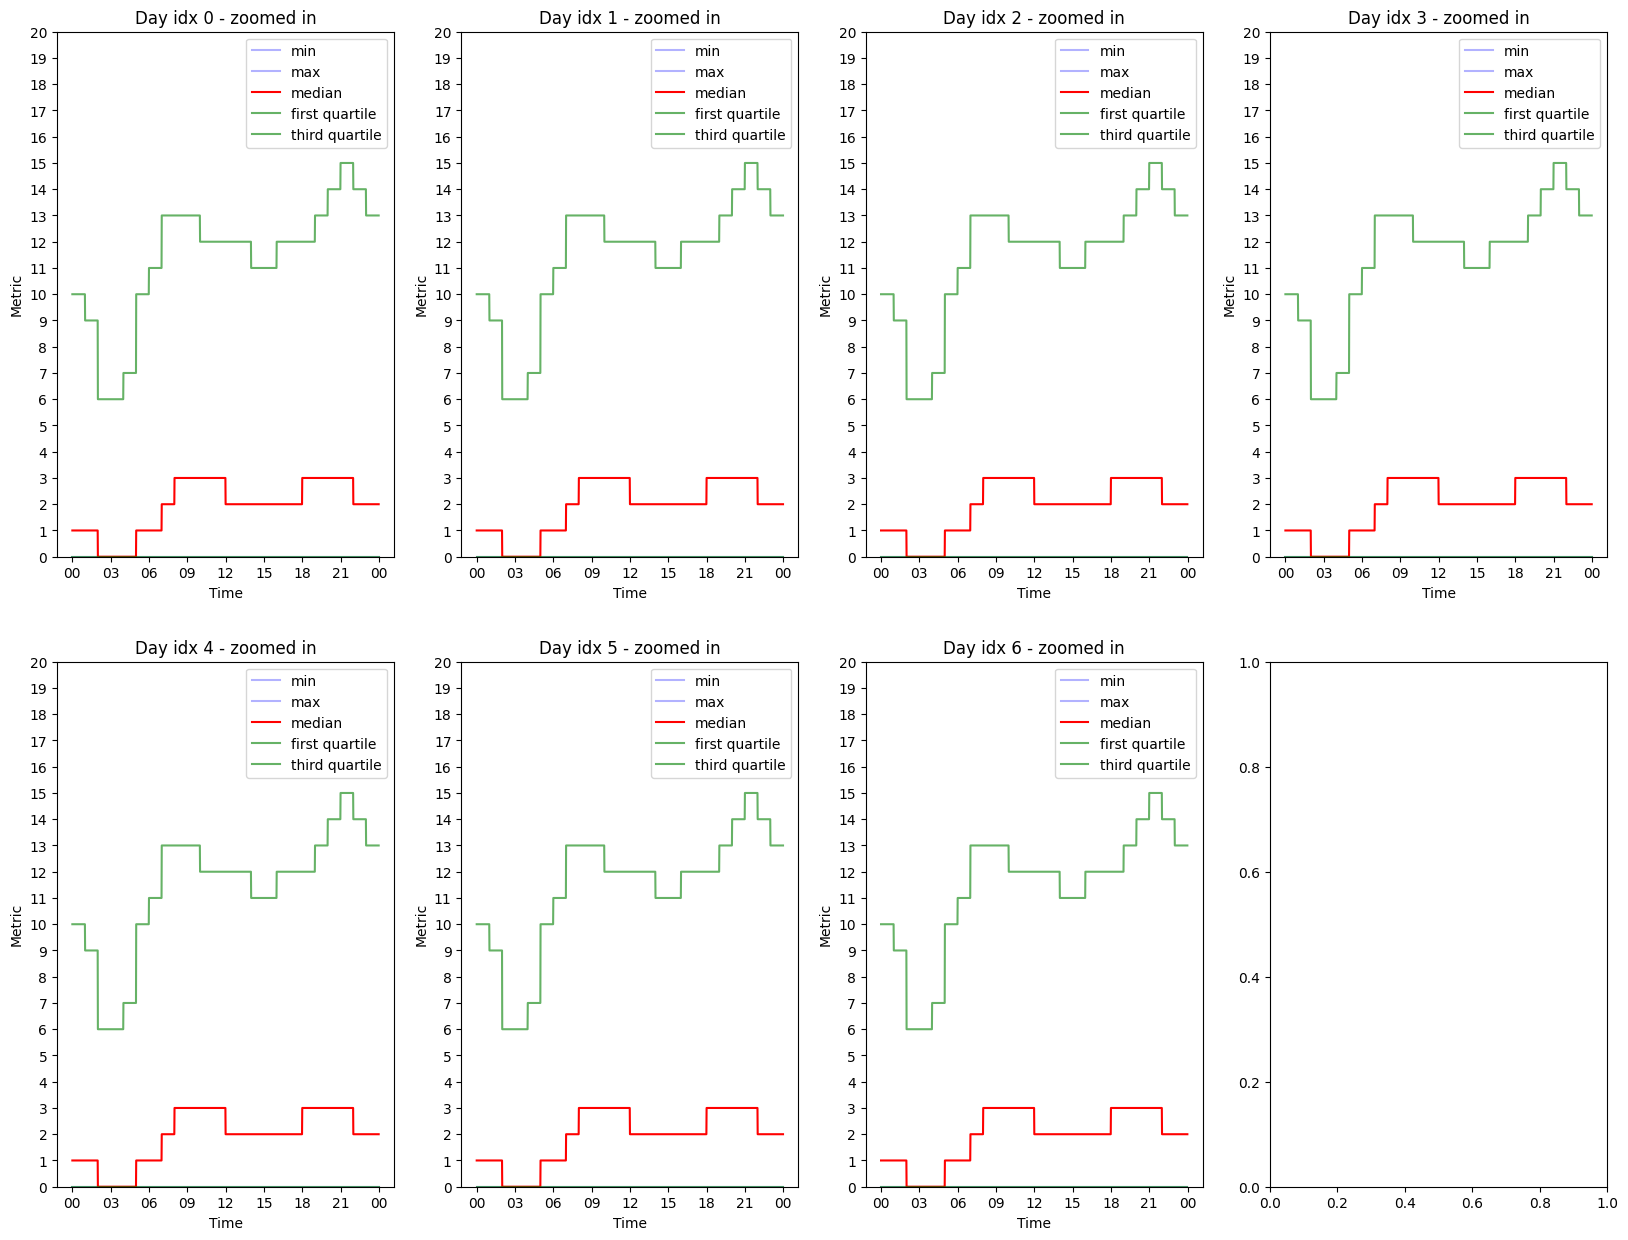

In [42]:
# Read processed_things.json

import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import datetime

with open('processed_things.json') as f:
    processed_things = json.load(f)

# Stats
total_primary_signal_missing_count = 0
total_cycle_second_missing_count = 0
total_skipped_cycles_count = 0
total_cycles_count = 0
total_removed_cycles_count = 0
total_invalid_cycle_length_count = 0
total_invalid_transition_in_cycle_count = 0
total_missing_observation_in_cycle_count = 0
cycles_counts_per_thing = []
primary_signal_missing_counts_per_thing = []
cycle_second_missing_counts_per_thing = []
removed_cycles_counts_per_thing = []
invalid_cycle_length_count_per_thing = []
invalid_transition_in_cycle_count_per_thing = []
missing_observation_in_cycle_count_per_thing = []
median_metrics_per_thing = []

# Cells for week days and hours metric study
cells = [
    [
        [] for i in range(24)
    ] for j in range(7)
]
    
for thing_name, thing in processed_things.items():
    total_primary_signal_missing_count += thing['PrimarySignalMissingCount']
    total_cycle_second_missing_count += thing['CycleSecondMissingCount']
    total_skipped_cycles_count += thing['TotalSkippedCycles']
    total_cycles_count += thing['TotalCyclesCount']
    total_removed_cycles_count += thing['TotalRemovedCycleCount']
    total_invalid_cycle_length_count += thing['TotalInvalidCycleLengthCount']
    total_invalid_transition_in_cycle_count += thing['TotalInvalidCycleTransitionCount']
    total_missing_observation_in_cycle_count += thing['TotalInvalidCycleMissingCount']
    
    primary_signal_missing_counts_per_thing.append(thing['PrimarySignalMissingCount'])
    cycle_second_missing_counts_per_thing.append(thing['CycleSecondMissingCount'])
    cycles_counts_per_thing.append(thing['TotalCyclesCount'])
    removed_cycles_counts_per_thing.append(thing['TotalRemovedCycleCount'])
    invalid_cycle_length_count_per_thing.append(thing['TotalInvalidCycleLengthCount'])
    invalid_transition_in_cycle_count_per_thing.append(thing['TotalInvalidCycleTransitionCount'])
    missing_observation_in_cycle_count_per_thing.append(thing['TotalInvalidCycleMissingCount'])
    
    total_metrics_of_thing = []
    metrics = thing["Metrics"]
    for day_idx in range(7):
        for hour_idx in range(24):
            cells[day_idx][hour_idx].append(metrics[day_idx][hour_idx])
            total_metrics_of_thing.append(metrics[day_idx][hour_idx])
    median_metrics_per_thing.append(np.median(np.array(total_metrics_of_thing)))
    
primary_signal_missing_counts_per_thing.sort(reverse=True)
cycle_second_missing_counts_per_thing.sort(reverse=True)
removed_cycles_counts_per_thing.sort(reverse=True)
invalid_cycle_length_count_per_thing.sort(reverse=True)
invalid_transition_in_cycle_count_per_thing.sort(reverse=True)
missing_observation_in_cycle_count_per_thing.sort(reverse=True)

PORTION = 0.2

primary_signal_missing_counts_per_thing_first_x_percent = primary_signal_missing_counts_per_thing[:int(len(primary_signal_missing_counts_per_thing) * PORTION)]
cycle_second_missing_counts_per_thing_first_x_percent = cycle_second_missing_counts_per_thing[:int(len(cycle_second_missing_counts_per_thing) * PORTION)]
removed_cycles_counts_per_thing_first_x_percent = removed_cycles_counts_per_thing[:int(len(removed_cycles_counts_per_thing) * PORTION)]
invalid_cycle_length_count_per_thing_first_x_percent = invalid_cycle_length_count_per_thing[:int(len(invalid_cycle_length_count_per_thing) * PORTION)]
invalid_transition_in_cycle_count_per_thing_first_x_percent = invalid_transition_in_cycle_count_per_thing[:int(len(invalid_transition_in_cycle_count_per_thing) * PORTION)]
missing_observation_in_cycle_count_per_thing_first_x_percent = missing_observation_in_cycle_count_per_thing[:int(len(missing_observation_in_cycle_count_per_thing) * PORTION)]

primary_signal_missing_counts_per_thing_first_x_percent_sum = sum(primary_signal_missing_counts_per_thing_first_x_percent)
cycle_second_missing_counts_per_thing_first_x_percent_sum = sum(cycle_second_missing_counts_per_thing_first_x_percent)
removed_cycles_counts_per_thing_first_x_percent_sum = sum(removed_cycles_counts_per_thing_first_x_percent)
invalid_cycle_length_count_per_thing_first_x_percent_sum = sum(invalid_cycle_length_count_per_thing_first_x_percent)
invalid_transition_in_cycle_count_per_thing_first_x_percent_sum = sum(invalid_transition_in_cycle_count_per_thing_first_x_percent)
missing_observation_in_cycle_count_per_thing_first_x_percent_sum = sum(missing_observation_in_cycle_count_per_thing_first_x_percent)

    
print('total_primary_signal_missing_count', total_primary_signal_missing_count, int(PORTION*100), '% of things make up', int((primary_signal_missing_counts_per_thing_first_x_percent_sum / total_primary_signal_missing_count)*100), '%')
print('total_cycle_second_missing_count', total_cycle_second_missing_count, int(PORTION*100),'% of things make up', int((cycle_second_missing_counts_per_thing_first_x_percent_sum / total_cycle_second_missing_count)*100), '%')
print('total_skipped_cycles_count', total_skipped_cycles_count)
print('total_cycles_count', total_cycles_count)
print('total_removed_cycles_count', total_removed_cycles_count, int(PORTION*100),'% of things make up', int((removed_cycles_counts_per_thing_first_x_percent_sum / total_removed_cycles_count)*100), '%')
print('total_invalid_cycle_length_count', total_invalid_cycle_length_count, int(PORTION*100),'% of things make up', int((invalid_cycle_length_count_per_thing_first_x_percent_sum / total_invalid_cycle_length_count)*100), '%')
print('total_invalid_transition_in_cycle_count', total_invalid_transition_in_cycle_count, int(PORTION*100),'% of things make up', int((invalid_transition_in_cycle_count_per_thing_first_x_percent_sum / total_invalid_transition_in_cycle_count)*100), '%')
print('total_missing_observation_in_cycle_count', total_missing_observation_in_cycle_count, int(PORTION*100),'% of things make up', int((missing_observation_in_cycle_count_per_thing_first_x_percent_sum / total_missing_observation_in_cycle_count)*100), '%')
print('total_median_metric_of_all_things', np.median(np.array(median_metrics_per_thing)))

histogram_data_to_plot = [
    {
        "data": primary_signal_missing_counts_per_thing,
        "title": "Primary signal missing count per thing histogram",
        "xlabel": "Primary signal missing count",
        "ylabel": "Things Count",
    },
    {
        "data": cycle_second_missing_counts_per_thing,
        "title": "Cycle second missing count per thing histogram",
        "xlabel": "Cycle second missing count",
        "ylabel": "Things Count",
    },
    {
        "data": cycles_counts_per_thing,
        "title": "Cycles count per thing histogram",
        "xlabel": "Cycles count",
        "ylabel": "Things Count",
    },
    {
        "data": removed_cycles_counts_per_thing,
        "title": "Removed cycles count per thing histogram",
        "xlabel": "Removed cycles count",
        "ylabel": "Things Count",
    },
    {
        "data": invalid_cycle_length_count_per_thing,
        "title": "Invalid cycle count per thing histogram",
        "xlabel": "Invalid cycle length count",
        "ylabel": "Things Count",
    },
    {
        "data": invalid_transition_in_cycle_count_per_thing,
        "title": "Invalid transition in cycle count per thing histogram",
        "xlabel": "Invalid transition in cycle count",
        "ylabel": "Things Count",
    },
    {
        "data": missing_observation_in_cycle_count_per_thing,
        "title": "Missing observation in cycle count per thing histogram",
        "xlabel": "Missing observation in cycle count",
        "ylabel": "Things Count",
    },
    {
        "data": median_metrics_per_thing,
        "title": "Median metric per thing histogram",
        "xlabel": "Median metric",
        "ylabel": "Things Count",
    },
]

number_of_charts = len(histogram_data_to_plot)
rows = int(number_of_charts / 4) + (1 if number_of_charts % 4 > 0 else 0)

fig, ax = plt.subplots(rows, 4, figsize=(20, 15))

for j in range(ax.shape[0]):
    for i in range(ax.shape[1]):
        index = i + j * ax.shape[1]
        if index >= number_of_charts:
            continue
        
        single_ax = ax[j][i]
        single_ax.hist(histogram_data_to_plot[index]["data"], bins=100)
        single_ax.set_xlabel(histogram_data_to_plot[index]["xlabel"])
        single_ax.set_ylabel(histogram_data_to_plot[index]["ylabel"])
        single_ax.set_title(histogram_data_to_plot[index]["title"])


cell_stats = [
    [
        {} for i in range(24)
    ] for j in range(7)
]

for day_idx in range(7):
    for hour_idx in range(24):
        metrics = np.array(cells[day_idx][hour_idx])
        metrics_cleaned = [] # without -1.0 (stands for no cycles in this time)
        for metric in metrics:
            if metric != -1.0:
                metrics_cleaned.append(metric)
        min = np.min(metrics_cleaned)
        max = np.max(metrics_cleaned)
        median = np.median(metrics_cleaned)
        first_quartile = np.percentile(metrics_cleaned, 25)
        third_quartile = np.percentile(metrics_cleaned, 75)
        cell_stats[day_idx][hour_idx] = {
            'min': min,
            'max': max,
            'median': median,
            'first_quartile': first_quartile,
            'third_quartile': third_quartile,
        }
        
hours = []
for i in range(24):
    hours.append(datetime.datetime(day=20, month=10, year=2023, hour=i, minute=0))
    hours.append(datetime.datetime(day=20, month=10, year=2023, hour=i, minute=59))
    
days = 7
rows = int(days / 4) + (1 if days % 4 > 0 else 0)

fig, ax = plt.subplots(rows, 4, figsize=(20, 15))

for j in range(ax.shape[0]):
    for i in range(ax.shape[1]):
        dayIdx = i + j * ax.shape[1]
        if dayIdx >= days:
            continue
        
        single_ax = ax[j][i]

        min_values = []
        max_values = []
        median_values = []
        first_quartile_values = []
        third_quartile_values = []
        
        for hour_idx in range(24):
            min_values.append(cell_stats[day_idx][hour_idx]['min'])
            max_values.append(cell_stats[day_idx][hour_idx]['max'])
            median_values.append(cell_stats[day_idx][hour_idx]['median'])
            first_quartile_values.append(cell_stats[day_idx][hour_idx]['first_quartile'])
            third_quartile_values.append(cell_stats[day_idx][hour_idx]['third_quartile'])

       
            min_values.append(cell_stats[day_idx][hour_idx]['min'])
            max_values.append(cell_stats[day_idx][hour_idx]['max'])
            median_values.append(cell_stats[day_idx][hour_idx]['median'])
            first_quartile_values.append(cell_stats[day_idx][hour_idx]['first_quartile'])
            third_quartile_values.append(cell_stats[day_idx][hour_idx]['third_quartile'])
        
        single_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
        single_ax.plot(hours, min_values, label="min", color='blue', alpha=0.3)
        single_ax.plot(hours, max_values, label="max", color='blue', alpha=0.3)
        single_ax.plot(hours, median_values, label="median", color='red', alpha=1)
        single_ax.plot(hours, first_quartile_values, label="first quartile", color='green', alpha=0.6)
        single_ax.plot(hours, third_quartile_values, label="third quartile", color='green', alpha=0.6)
        single_ax.set_xlabel('Time')
        single_ax.set_ylabel('Metric')
        single_ax.set_title(f"Day idx {str(dayIdx)}")
        single_ax.legend()
        
        # y axis log scale
        # single_ax.set_yscale('symlog')
        # single_ax.yaxis.set_minor_formatter(mticker.ScalarFormatter())
        
days = 7
rows = int(days / 4) + (1 if days % 4 > 0 else 0)

fig, ax = plt.subplots(rows, 4, figsize=(20, 15))

for j in range(ax.shape[0]):
    for i in range(ax.shape[1]):
        dayIdx = i + j * ax.shape[1]
        if dayIdx >= days:
            continue
        
        single_ax = ax[j][i]

        min_values = []
        max_values = []
        median_values = []
        first_quartile_values = []
        third_quartile_values = []
        
        for hour_idx in range(24):
            min_values.append(cell_stats[day_idx][hour_idx]['min'])
            max_values.append(cell_stats[day_idx][hour_idx]['max'])
            median_values.append(cell_stats[day_idx][hour_idx]['median'])
            first_quartile_values.append(cell_stats[day_idx][hour_idx]['first_quartile'])
            third_quartile_values.append(cell_stats[day_idx][hour_idx]['third_quartile'])

       
            min_values.append(cell_stats[day_idx][hour_idx]['min'])
            max_values.append(cell_stats[day_idx][hour_idx]['max'])
            median_values.append(cell_stats[day_idx][hour_idx]['median'])
            first_quartile_values.append(cell_stats[day_idx][hour_idx]['first_quartile'])
            third_quartile_values.append(cell_stats[day_idx][hour_idx]['third_quartile'])
        
        single_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
        single_ax.plot(hours, min_values, label="min", color='blue', alpha=0.3)
        single_ax.plot(hours, max_values, label="max", color='blue', alpha=0.3)
        single_ax.plot(hours, median_values, label="median", color='red', alpha=1)
        single_ax.plot(hours, first_quartile_values, label="first quartile", color='green', alpha=0.6)
        single_ax.plot(hours, third_quartile_values, label="third quartile", color='green', alpha=0.6)
        single_ax.set_xlabel('Time')
        single_ax.set_ylabel('Metric')
        single_ax.set_ylim([0, 20])
        single_ax.set_title(f"Day idx {str(dayIdx)} - zoomed in")
        single_ax.yaxis.set_major_locator(mticker.MultipleLocator(1))
        single_ax.legend()

    